In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv("android_traffic.csv",delimiter=";")
df

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,Zsone,0,0,0,0,0,0,2,2,257,143,NaN,NaN,NaN,2,2,malicious
7841,Zsone,4,4,1,296,0,0,5,1,86,382,NaN,NaN,NaN,5,1,malicious
7842,Zsone,0,0,0,0,0,0,2,2,257,143,NaN,NaN,NaN,2,2,malicious
7843,Zsone,0,0,0,0,0,0,2,2,257,143,NaN,NaN,NaN,2,2,malicious


In [3]:
df["type"].value_counts()

benign       4704
malicious    3141
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

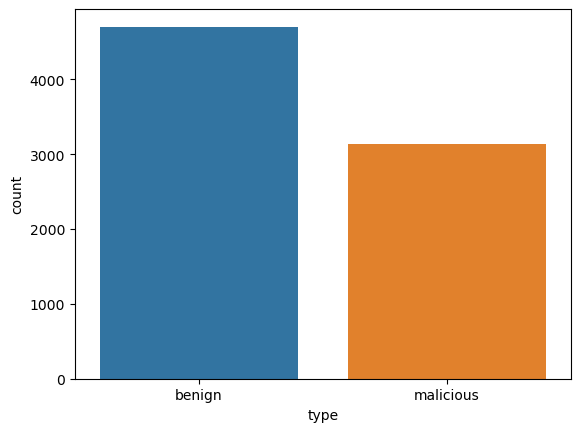

In [4]:
sns.countplot(x=df["type"])

In [8]:
4704/(4704+3141) # 60% benign data And 40% malicious data

0.5996175908221797

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7845 non-null   object 
 1   tcp_packets           7845 non-null   int64  
 2   dist_port_tcp         7845 non-null   int64  
 3   external_ips          7845 non-null   int64  
 4   vulume_bytes          7845 non-null   int64  
 5   udp_packets           7845 non-null   int64  
 6   tcp_urg_packet        7845 non-null   int64  
 7   source_app_packets    7845 non-null   int64  
 8   remote_app_packets    7845 non-null   int64  
 9   source_app_bytes      7845 non-null   int64  
 10  remote_app_bytes      7845 non-null   int64  
 11  duracion              0 non-null      float64
 12  avg_local_pkt_rate    0 non-null      float64
 13  avg_remote_pkt_rate   0 non-null      float64
 14  source_app_packets.1  7845 non-null   int64  
 15  dns_query_times      

In [12]:
df["name"].nunique()

114

In [13]:
df["name"].value_counts()

Reading             774
Plankton            483
DroidKungFu         427
AntiVirus           396
NewsAndMagazines    360
                   ... 
Saiva                 1
Gmuse                 1
EICAR-Test-File       1
EWalls                1
SafeKidZone           1
Name: name, Length: 114, dtype: int64

In [15]:
df["type"].value_counts().to_dict()

{'benign': 4704, 'malicious': 3141}

In [5]:
df["type"].replace({'benign': 0, 'malicious': 1},inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7845 non-null   object 
 1   tcp_packets           7845 non-null   int64  
 2   dist_port_tcp         7845 non-null   int64  
 3   external_ips          7845 non-null   int64  
 4   vulume_bytes          7845 non-null   int64  
 5   udp_packets           7845 non-null   int64  
 6   tcp_urg_packet        7845 non-null   int64  
 7   source_app_packets    7845 non-null   int64  
 8   remote_app_packets    7845 non-null   int64  
 9   source_app_bytes      7845 non-null   int64  
 10  remote_app_bytes      7845 non-null   int64  
 11  duracion              0 non-null      float64
 12  avg_local_pkt_rate    0 non-null      float64
 13  avg_remote_pkt_rate   0 non-null      float64
 14  source_app_packets.1  7845 non-null   int64  
 15  dns_query_times      

In [20]:
df.corr()

C:\Users\Sohel's\AppData\Local\Temp\ipykernel_14864\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
tcp_packets,1.000000,0.083200,0.170878,0.904676,-0.001887,-0.002640,0.999692,0.920660,0.744218,0.904168,NaN,NaN,NaN,0.999692,0.049169,-0.078641
dist_port_tcp,0.083200,1.000000,0.168485,0.106970,-0.000312,0.003482,0.087184,0.072343,0.052228,0.109852,NaN,NaN,NaN,0.087184,0.170546,-0.086772
external_ips,0.170878,0.168485,1.000000,0.188985,0.057033,-0.009553,0.176821,0.163600,0.133490,0.193299,NaN,NaN,NaN,0.176821,0.256013,-0.247536
vulume_bytes,0.904676,0.106970,0.188985,1.000000,0.002290,-0.002748,0.905204,0.744530,0.492412,0.999846,NaN,NaN,NaN,0.905204,0.077371,-0.067534
udp_packets,-0.001887,-0.000312,0.057033,0.002290,1.000000,-0.000650,0.000080,-0.001438,-0.001625,0.002390,NaN,NaN,NaN,0.000080,0.005748,-0.026907
tcp_urg_packet,-0.002640,0.003482,-0.009553,-0.002748,-0.000650,1.000000,-0.002745,-0.002612,-0.002280,-0.002818,NaN,NaN,NaN,-0.002745,-0.004139,-0.013049
source_app_packets,0.999692,0.087184,0.176821,0.905204,0.000080,-0.002745,1.000000,0.920264,0.743562,0.905128,NaN,NaN,NaN,1.000000,0.073735,-0.078329
remote_app_packets,0.920660,0.072343,0.163600,0.744530,-0.001438,-0.002612,0.920264,1.000000,0.940784,0.744114,NaN,NaN,NaN,0.920264,0.040515,-0.074458
source_app_bytes,0.744218,0.052228,0.133490,0.492412,-0.001625,-0.002280,0.743562,0.940784,1.000000,0.492004,NaN,NaN,NaN,0.743562,0.019273,-0.063112
remote_app_bytes,0.904168,0.109852,0.193299,0.999846,0.002390,-0.002818,0.905128,0.744114,0.492004,1.000000,NaN,NaN,NaN,0.905128,0.094869,-0.067577


C:\Users\Sohel's\AppData\Local\Temp\ipykernel_14864\57407712.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().tail(1))


<Figure size 100x1000 with 0 Axes>

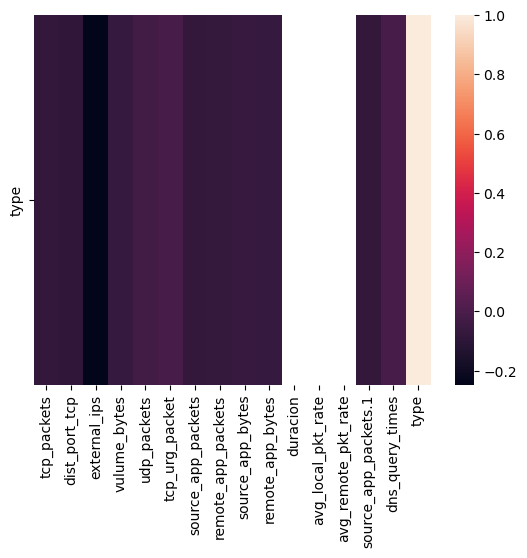

<Figure size 100x1000 with 0 Axes>

In [25]:
sns.heatmap(df.corr().tail(1))
plt.figure(figsize=(1,10))

In [27]:
df.corr().tail(1) # No relation between dependent and independent column

C:\Users\Sohel's\AppData\Local\Temp\ipykernel_14864\1729002507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().tail(1) # No relation between dependent and independent column


,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
type,-0.078641,-0.086772,-0.247536,-0.067534,-0.026907,-0.013049,-0.078329,-0.074458,-0.063112,-0.067577,NaN,NaN,NaN,-0.078329,-0.009106,1.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7845 non-null   object 
 1   tcp_packets           7845 non-null   int64  
 2   dist_port_tcp         7845 non-null   int64  
 3   external_ips          7845 non-null   int64  
 4   vulume_bytes          7845 non-null   int64  
 5   udp_packets           7845 non-null   int64  
 6   tcp_urg_packet        7845 non-null   int64  
 7   source_app_packets    7845 non-null   int64  
 8   remote_app_packets    7845 non-null   int64  
 9   source_app_bytes      7845 non-null   int64  
 10  remote_app_bytes      7845 non-null   int64  
 11  duracion              0 non-null      float64
 12  avg_local_pkt_rate    0 non-null      float64
 13  avg_remote_pkt_rate   0 non-null      float64
 14  source_app_packets.1  7845 non-null   int64  
 15  dns_query_times      

In [6]:
df.drop(columns=["duracion","avg_local_pkt_rate","source_app_packets.1"],inplace=True)

In [32]:
df.columns

Index(['name', 'tcp_packets', 'dist_port_tcp', 'external_ips', 'vulume_bytes',
       'udp_packets', 'tcp_urg_packet', 'source_app_packets',
       'remote_app_packets', 'source_app_bytes', 'remote_app_bytes',
       'avg_remote_pkt_rate', 'dns_query_times', 'type'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 7845 non-null   object 
 1   tcp_packets          7845 non-null   int64  
 2   dist_port_tcp        7845 non-null   int64  
 3   external_ips         7845 non-null   int64  
 4   vulume_bytes         7845 non-null   int64  
 5   udp_packets          7845 non-null   int64  
 6   tcp_urg_packet       7845 non-null   int64  
 7   source_app_packets   7845 non-null   int64  
 8   remote_app_packets   7845 non-null   int64  
 9   source_app_bytes     7845 non-null   int64  
 10  remote_app_bytes     7845 non-null   int64  
 11  avg_remote_pkt_rate  0 non-null      float64
 12  dns_query_times      7845 non-null   int64  
 13  type                 7845 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 858.2+ KB


In [7]:
df = df.drop("avg_remote_pkt_rate",axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                7845 non-null   object
 1   tcp_packets         7845 non-null   int64 
 2   dist_port_tcp       7845 non-null   int64 
 3   external_ips        7845 non-null   int64 
 4   vulume_bytes        7845 non-null   int64 
 5   udp_packets         7845 non-null   int64 
 6   tcp_urg_packet      7845 non-null   int64 
 7   source_app_packets  7845 non-null   int64 
 8   remote_app_packets  7845 non-null   int64 
 9   source_app_bytes    7845 non-null   int64 
 10  remote_app_bytes    7845 non-null   int64 
 11  dns_query_times     7845 non-null   int64 
 12  type                7845 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 796.9+ KB


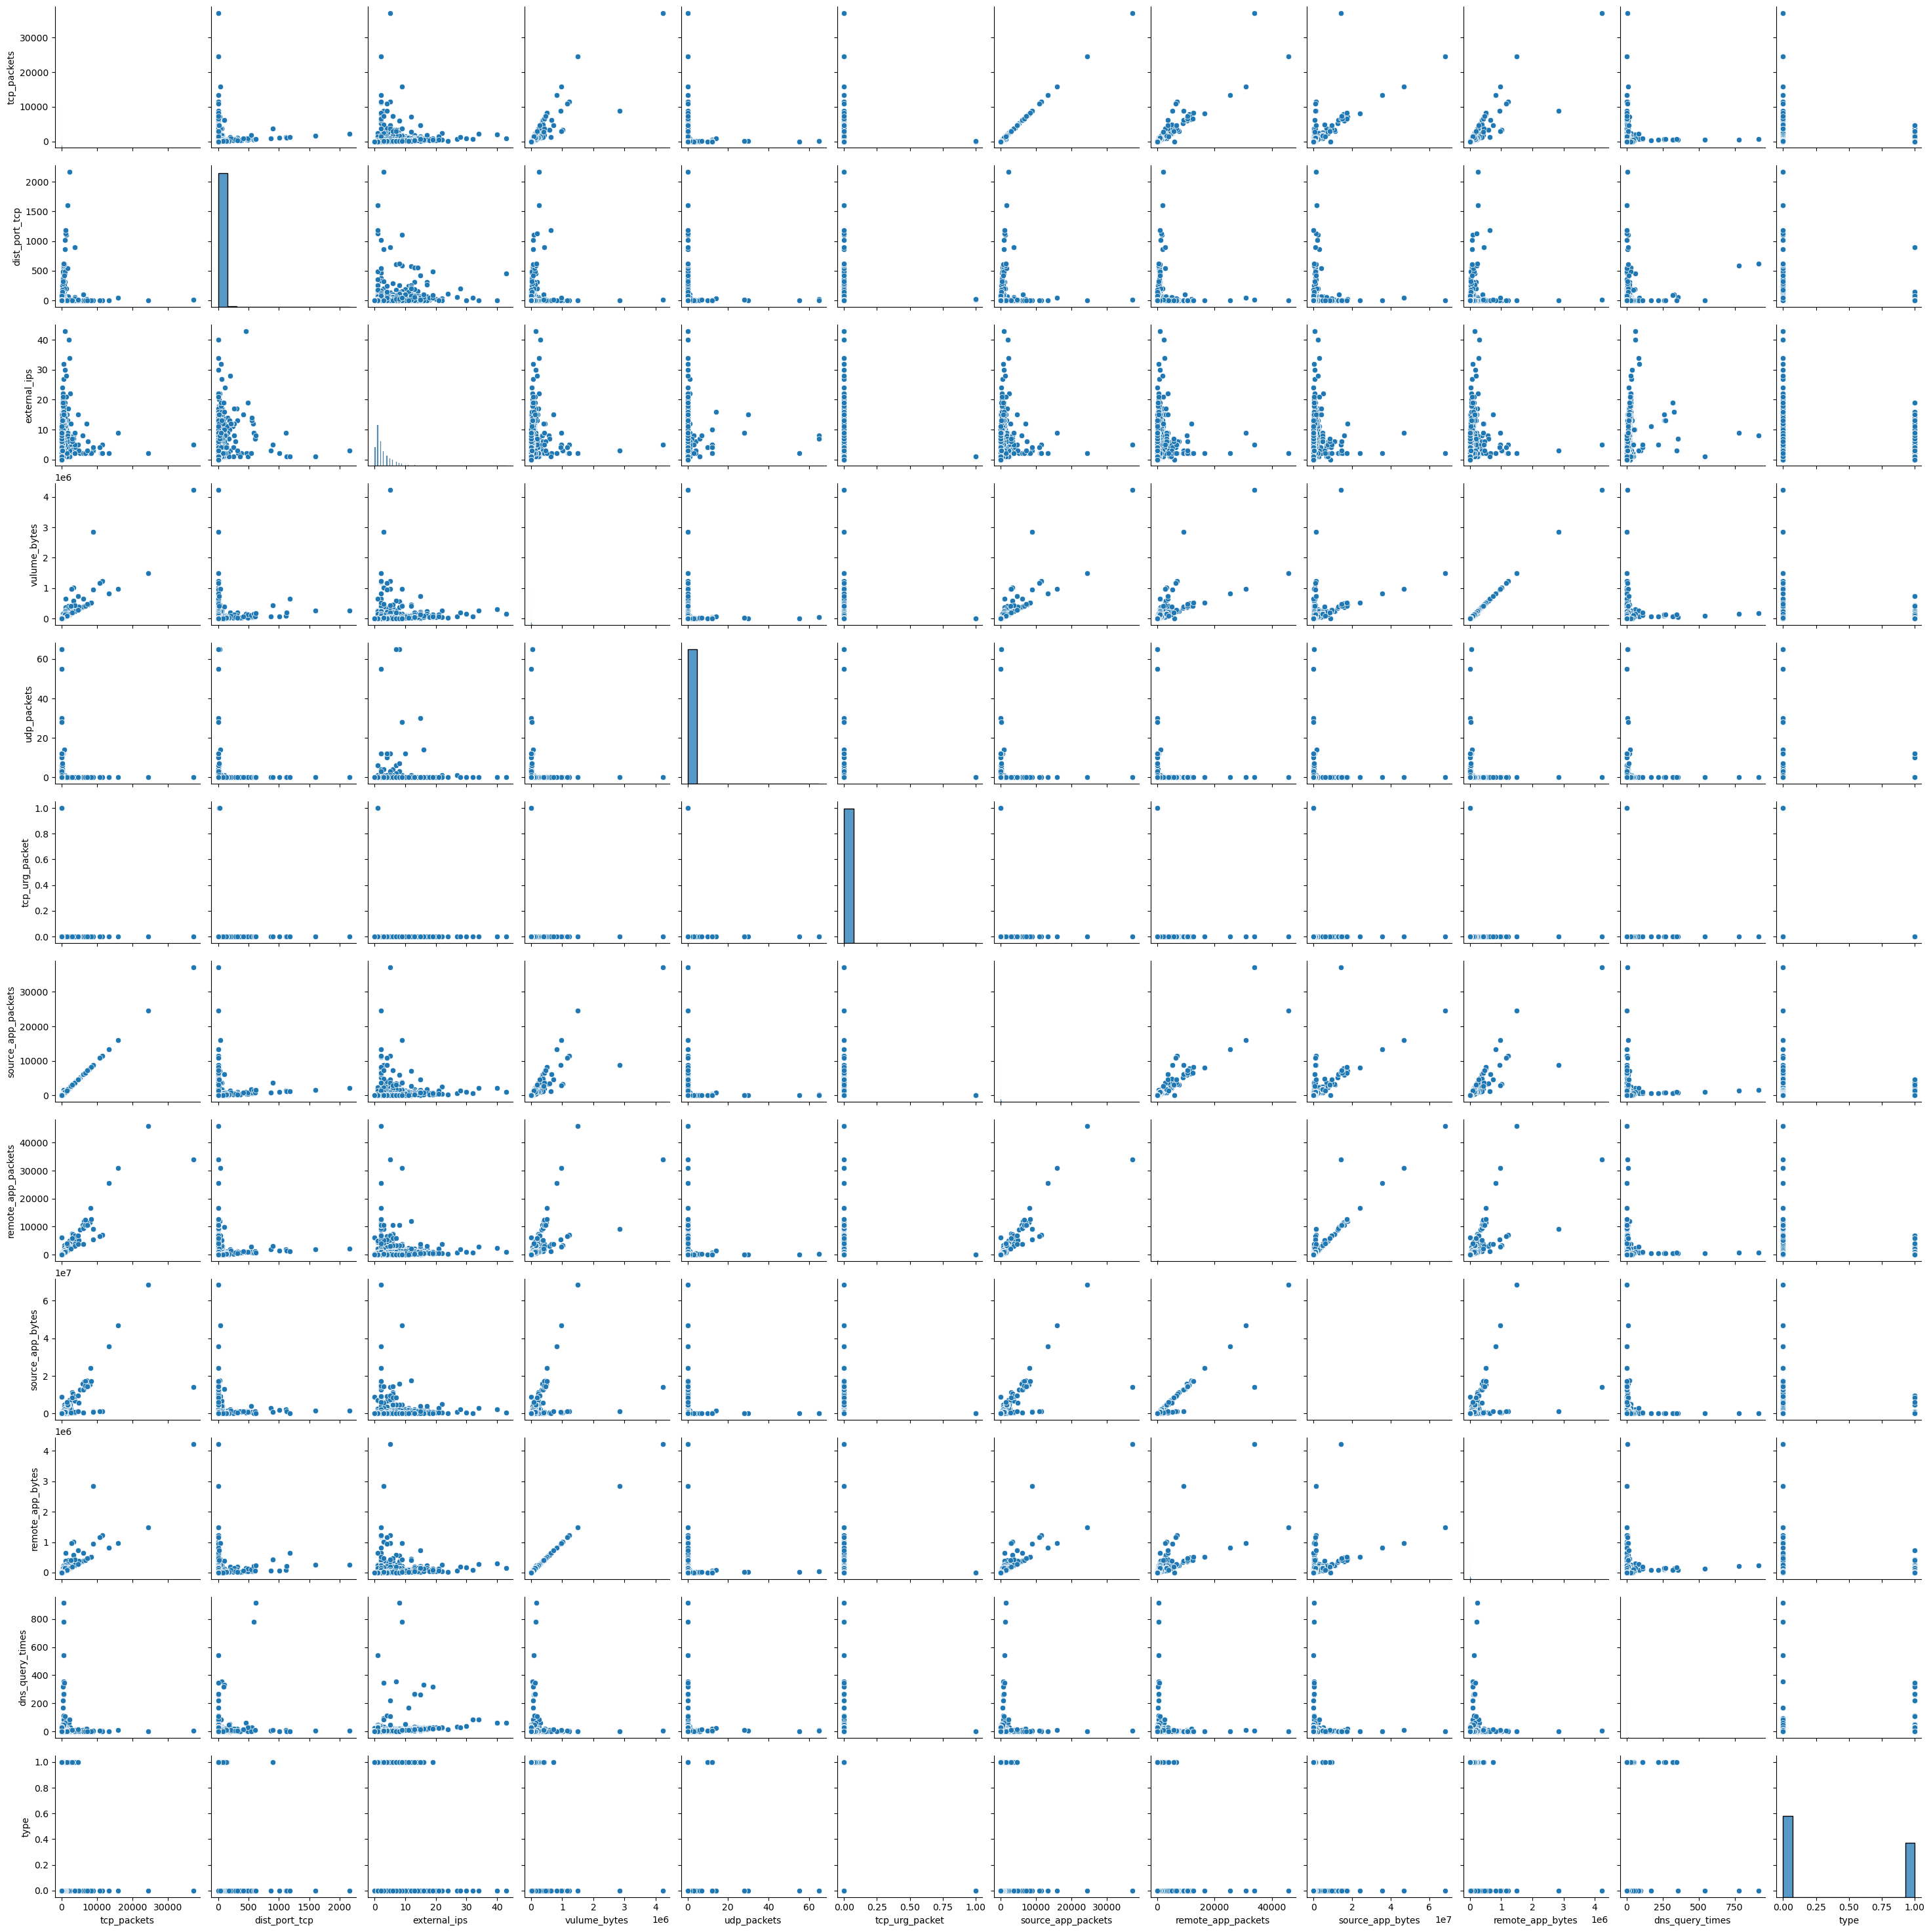

In [38]:
sns.pairplot(df)

In [39]:
df = df.drop("name",axis=1)

<Axes: xlabel='tcp_packets'>

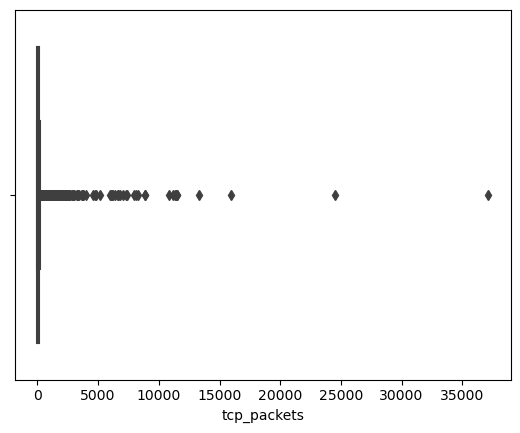

In [40]:
sns.boxplot(x=df["tcp_packets"])

<Axes: >

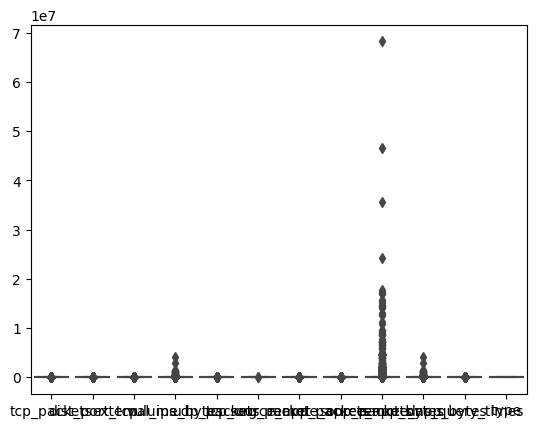

In [42]:
sns.boxplot(df)

## Feature Engineering & Feature Selection

### Data Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler

In [12]:
df.drop("name",axis=1,inplace=True)

In [13]:
df

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times,type
0,36,6,3,3911,0,0,39,33,5100,4140,3,0
1,117,0,9,23514,0,0,128,107,26248,24358,11,0
2,196,0,6,24151,0,0,205,214,163887,24867,9,0
3,6,0,1,889,0,0,7,6,819,975,1,0
4,6,0,1,882,0,0,7,6,819,968,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7840,0,0,0,0,0,0,2,2,257,143,2,1
7841,4,4,1,296,0,0,5,1,86,382,1,1
7842,0,0,0,0,0,0,2,2,257,143,2,1
7843,0,0,0,0,0,0,2,2,257,143,2,1


In [14]:
x = df.drop("type",axis=1)
y = df["type"]

In [15]:
std_scalar = StandardScaler()
arr1 = std_scalar.fit_transform(x)
x_std = pd.DataFrame(arr1,columns=x.columns)
x_std

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,dns_query_times
0,-0.143441,-0.033652,0.086046,-0.153587,-0.040693,-0.015969,-0.146231,-0.151404,-0.140898,-0.155173,-0.100476
1,-0.039311,-0.149817,2.138859,0.084743,-0.040693,-0.015969,-0.031980,-0.082119,-0.125803,0.090261,0.322821
2,0.062249,-0.149817,1.112453,0.092488,-0.040693,-0.015969,0.066867,0.018064,-0.027559,0.096440,0.216997
3,-0.182008,-0.149817,-0.598225,-0.190328,-0.040693,-0.015969,-0.187310,-0.176684,-0.143954,-0.193594,-0.206300
4,-0.182008,-0.149817,-0.598225,-0.190414,-0.040693,-0.015969,-0.187310,-0.176684,-0.143954,-0.193679,-0.206300
...,...,...,...,...,...,...,...,...,...,...,...
7840,-0.189721,-0.149817,-0.940360,-0.201137,-0.040693,-0.015969,-0.193729,-0.180429,-0.144355,-0.203694,-0.153388
7841,-0.184579,-0.072374,-0.598225,-0.197538,-0.040693,-0.015969,-0.189878,-0.181365,-0.144477,-0.200793,-0.206300
7842,-0.189721,-0.149817,-0.940360,-0.201137,-0.040693,-0.015969,-0.193729,-0.180429,-0.144355,-0.203694,-0.153388
7843,-0.189721,-0.149817,-0.940360,-0.201137,-0.040693,-0.015969,-0.193729,-0.180429,-0.144355,-0.203694,-0.153388


In [16]:
x_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tcp_packets         7845 non-null   float64
 1   dist_port_tcp       7845 non-null   float64
 2   external_ips        7845 non-null   float64
 3   vulume_bytes        7845 non-null   float64
 4   udp_packets         7845 non-null   float64
 5   tcp_urg_packet      7845 non-null   float64
 6   source_app_packets  7845 non-null   float64
 7   remote_app_packets  7845 non-null   float64
 8   source_app_bytes    7845 non-null   float64
 9   remote_app_bytes    7845 non-null   float64
 10  dns_query_times     7845 non-null   float64
dtypes: float64(11)
memory usage: 674.3 KB


### Train Test Split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)

In [20]:
x_train.shape

(6276, 11)

### Model Building

#### 1.Logistic regression

In [38]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
# {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}

LogisticRegression()

In [39]:
print("-----------------------------------------------Testing Evaluation-------------------------------------------------")
y_pred = logistic_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("Classifiaction Report :\n",clf_report)

print("-----------------------------------------------Training Evaluation-------------------------------------------------")
y_pred_train = logistic_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classifiaction Report :\n",clf_report)

-----------------------------------------------Testing Evaluation-------------------------------------------------
Confusion Matrix
 [[888  53]
 [429 199]]
Accuracy : 0.6927979604843849
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.67      0.94      0.79       941
           1       0.79      0.32      0.45       628

    accuracy                           0.69      1569
   macro avg       0.73      0.63      0.62      1569
weighted avg       0.72      0.69      0.65      1569

-----------------------------------------------Training Evaluation-------------------------------------------------
Confusion Matrix
 [[3564  199]
 [1721  792]]
Accuracy : 0.6940726577437859
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.67      0.95      0.79      3763
           1       0.80      0.32      0.45      2513

    accuracy                           0.69      6276
   macro avg       0.74     

#### Hyperparameter Tuning

In [43]:
hyper = {"penalty":['l1', 'l2', 'elasticnet']
    ,"solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
gscv = GridSearchCV(logistic_model,hyper,cv=5)

In [46]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [45]:
from warnings import filterwarnings
filterwarnings("ignore")

In [47]:
print("-----------------------------------------------Testing Evaluation-------------------------------------------------")
y_pred = gscv.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("Classifiaction Report :\n",clf_report)

print("-----------------------------------------------Training Evaluation-------------------------------------------------")
y_pred_train = gscv.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classifiaction Report :\n",clf_report)

-----------------------------------------------Testing Evaluation-------------------------------------------------
Confusion Matrix
 [[891  50]
 [385 243]]
Accuracy : 0.722753346080306
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.70      0.95      0.80       941
           1       0.83      0.39      0.53       628

    accuracy                           0.72      1569
   macro avg       0.76      0.67      0.67      1569
weighted avg       0.75      0.72      0.69      1569

-----------------------------------------------Training Evaluation-------------------------------------------------
Confusion Matrix
 [[3565  198]
 [1528  985]]
Accuracy : 0.7249840662842575
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.70      0.95      0.81      3763
           1       0.83      0.39      0.53      2513

    accuracy                           0.72      6276
   macro avg       0.77      

### KNN

In [48]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
print("-----------------------------------------------Testing Evaluation-------------------------------------------------")
y_pred = knn_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("Classifiaction Report :\n",clf_report)

print("-----------------------------------------------Training Evaluation-------------------------------------------------")
y_pred_train = knn_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classifiaction Report :\n",clf_report)

-----------------------------------------------Testing Evaluation-------------------------------------------------
Confusion Matrix
 [[805 136]
 [139 489]]
Accuracy : 0.8247291268323773
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       941
           1       0.78      0.78      0.78       628

    accuracy                           0.82      1569
   macro avg       0.82      0.82      0.82      1569
weighted avg       0.82      0.82      0.82      1569

-----------------------------------------------Training Evaluation-------------------------------------------------
Confusion Matrix
 [[3400  363]
 [ 367 2146]]
Accuracy : 0.8836838750796686
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      3763
           1       0.86      0.85      0.85      2513

    accuracy                           0.88      6276
   macro avg       0.88     

#### Hyperparameter Tuning

In [51]:
hyper = {"n_neighbors":np.arange(1,31),
        "p":[1,2]}
gscv = GridSearchCV(knn_model,hyper,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'p': [1, 2]})

In [53]:
print("----------------------------------------------- Testing Evaluation -------------------------------------------------")
y_pred = gscv.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("Classifiaction Report :\n",clf_report)

print("----------------------------------------------- Training Evaluation -------------------------------------------------")
y_pred_train = gscv.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classifiaction Report :\n",clf_report)

----------------------------------------------- Testing Evaluation -------------------------------------------------
Confusion Matrix
 [[800 141]
 [127 501]]
Accuracy : 0.8291905672402804
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       941
           1       0.78      0.80      0.79       628

    accuracy                           0.83      1569
   macro avg       0.82      0.82      0.82      1569
weighted avg       0.83      0.83      0.83      1569

----------------------------------------------- Training Evaluation -------------------------------------------------
Confusion Matrix
 [[3716   47]
 [  27 2486]]
Accuracy : 0.9882090503505417
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3763
           1       0.98      0.99      0.99      2513

    accuracy                           0.99      6276
   macro avg       0.99 

In [54]:
gscv.best_params_

{'n_neighbors': 1, 'p': 1}

### Decision Tree

In [55]:
decision_model = DecisionTreeClassifier()
decision_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
print("----------------------------------------------- Testing Evaluation -------------------------------------------------")
y_pred = decision_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("Classifiaction Report :\n",clf_report)

print("----------------------------------------------- Training Evaluation -------------------------------------------------")
y_pred_train = decision_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classifiaction Report :\n",clf_report)

----------------------------------------------- Testing Evaluation -------------------------------------------------
Confusion Matrix
 [[835 106]
 [ 90 538]]
Accuracy : 0.8750796685787126
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       941
           1       0.84      0.86      0.85       628

    accuracy                           0.88      1569
   macro avg       0.87      0.87      0.87      1569
weighted avg       0.88      0.88      0.88      1569

----------------------------------------------- Training Evaluation -------------------------------------------------
Confusion Matrix
 [[3721   42]
 [  20 2493]]
Accuracy : 0.9901210962396431
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3763
           1       0.98      0.99      0.99      2513

    accuracy                           0.99      6276
   macro avg       0.99 

<Axes: >

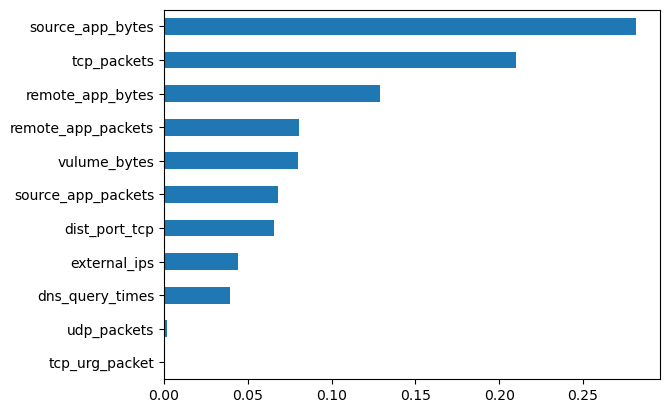

In [62]:
arr1 = decision_model.feature_importances_
s1 = pd.Series(arr1,index=x.columns)
s1.sort_values().plot(kind="barh")

#### Hyperparameter Tuning

In [65]:
hyper = {"criterion":["gini","entropy"],
        "min_samples_split":np.arange(2,25),
        "min_samples_leaf":np.arange(2,16),
        "max_depth":[7,8,9]}
gscv = GridSearchCV(decision_model,hyper,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9],
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])})

In [66]:
print("----------------------------------------------- Testing Evaluation -------------------------------------------------")
y_pred = gscv.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred)
print("Classifiaction Report :\n",clf_report)

print("----------------------------------------------- Training Evaluation -------------------------------------------------")
y_pred_train = gscv.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_pred_train)
print("Classifiaction Report :\n",clf_report)

----------------------------------------------- Testing Evaluation -------------------------------------------------
Confusion Matrix
 [[862  79]
 [260 368]]
Accuracy : 0.7839388145315488
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       941
           1       0.82      0.59      0.68       628

    accuracy                           0.78      1569
   macro avg       0.80      0.75      0.76      1569
weighted avg       0.79      0.78      0.78      1569

----------------------------------------------- Training Evaluation -------------------------------------------------
Confusion Matrix
 [[3571  192]
 [ 989 1524]]
Accuracy : 0.8118228170809433
Classifiaction Report :
               precision    recall  f1-score   support

           0       0.78      0.95      0.86      3763
           1       0.89      0.61      0.72      2513

    accuracy                           0.81      6276
   macro avg       0.84 